<a href="https://colab.research.google.com/github/drscicomm/food-security/blob/main/WordCloud_Analysis_ML_Corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# upload file
from google.colab import files
uploaded = files.upload()

Saving text.xlsx to text.xlsx


In [ ]:
# Load libraries
import pandas as pd
import numpy as np

In [ ]:
# Read data into 'data' dataframe
data = pd.read_excel('/content/text.xlsx')
data.head()

,author,year,paper_text,index
0,Madichetty,2020,Social media platform like Twitter is one of t...,0
1,Eyre,2021,Background: Achieving food security remains a ...,1
2,Gadzalo,2020,\n\nAbstract\nThe methodological approach for ...,2
3,Nica-Avram,2021,\nFood insecurity in the UK has captured publi...,3
4,Shi,2021,\n\nis only making things worse [22]. Even aft...,4


In [ ]:
del data['index']

# Preprocess data

In [ ]:
data = data.dropna(subset=['paper_text'])

In [ ]:
# Load the regular expression library
import re

# Remove punctuation
data['paper_text_processed'] = \
data['paper_text'].map(lambda x: re.sub('[,\.!?:]', '', x))

# Convert the titles to lowercase
data['paper_text_processed'] = \
data['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
data['paper_text_processed'].head()

0    social media platform like twitter is one of t...
1    background achieving food security remains a k...
2    \n\nabstract\nthe methodological approach for ...
3    \nfood insecurity in the uk has captured publi...
4    \n\nis only making things worse [22] even afte...
Name: paper_text_processed, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#additional stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
# update stopwords
stop_words = {'given','november','also','na','may','yes','log','lev','wwwplosoneorg','used','plosone','using','et','1b','iii','one','two','use','plos','al','gi','j','ic','ur','sd','ar','fs','gi','f','b','es'
    
}
STOP_WORDS.update(stop_words) #spacy stop words
STOPWORDS.update(stop_words) #WordCloud stop words

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(data['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white", max_words=100, contour_width=3, contour_color='steelblue', collocations=True)

# Generate a word cloud
wordcloud.generate(long_string)

In [ ]:
#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image

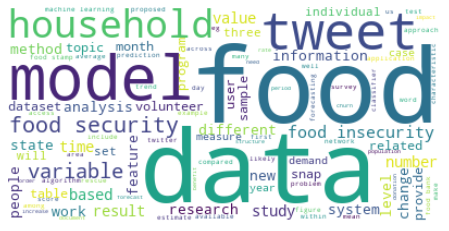

In [ ]:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
word_freq={k: v for k, v in sorted(wordcloud.process_text(long_string).items(),reverse=True, key=lambda item: item[1])}

rel_freq=wordcloud.words_

In [ ]:
print(list(word_freq.items()))
print(list(rel_freq.items()))

[('food', 451), ('data', 423), ('model', 401), ('tweet', 282), ('household', 279), ('food security', 258), ('variable', 228), ('food insecurity', 199), ('study', 173), ('based', 164), ('number', 155), ('result', 147), ('time', 141), ('value', 141), ('state', 125), ('information', 123), ('method', 122), ('different', 116), ('research', 113), ('new', 109), ('system', 108), ('change', 108), ('work', 105), ('level', 104), ('people', 104), ('analysis', 103), ('feature', 101), ('volunteer', 101), ('month', 100), ('provide', 98), ('user', 98), ('sample', 97), ('program', 95), ('related', 94), ('dataset', 91), ('table', 89), ('snap', 89), ('topic', 87), ('individual', 87), ('set', 86), ('will', 86), ('three', 86), ('measure', 85), ('year', 85), ('case', 84), ('demand', 84), ('machine learning', 84), ('network', 83), ('available', 81), ('food stamp', 81), ('test', 80), ('first', 79), ('prediction', 79), ('problem', 78), ('include', 78), ('algorithm', 78), ('score', 78), ('example', 78), ('figur

In [ ]:
word_freq_all = pd.Series(word_freq)
print(word_freq_all) 

food          451
data          423
model         401
tweet         282
household     279
             ... 
hired           1
kick            1
endemic         1
flip            1
foods food      1
Length: 8595, dtype: int64


In [ ]:
rel_freq_all = pd.Series(rel_freq)
print(rel_freq_all)

food         1.000000
data         0.937916
model        0.889135
tweet        0.625277
household    0.618625
               ...   
impact       0.121951
structure    0.121951
forecast     0.121951
document     0.121951
order        0.119734
Length: 100, dtype: float64


In [ ]:
word_freq_rel = pd.concat([word_freq_all, rel_freq_all], axis=1)
word_freq_rel.head()

,0,1
food,451,1.000000
data,423,0.937916
model,401,0.889135
tweet,282,0.625277
household,279,0.618625


In [ ]:
word_freq_rel.to_csv('word frequency.csv')

# Per Author

In [ ]:
#filter the df to one author, and create a list of responses from them
text = data[data.author =='Madichetty'].paper_text_processed.tolist() 

# Join the different processed titles together.
long_string1 = ','.join(list(text))

#create the wordcloud object
wordcloud1 = WordCloud(stopwords = STOPWORDS, background_color="white", max_words=25, contour_width=3, contour_color='steelblue', collocations=True)

# Generate a word cloud
wordcloud1.generate(long_string1)

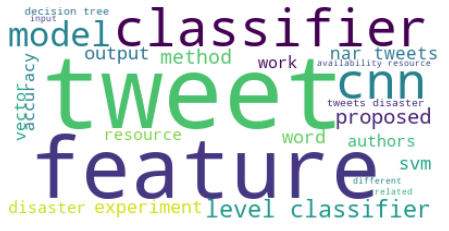

In [ ]:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud1, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
word_freq1={k: v for k, v in sorted(wordcloud1.process_text(long_string1).items(),reverse=True, key=lambda item: item[1])}

rel_freq1=wordcloud1.words_

In [ ]:
word_freq_Madichetty = pd.Series(word_freq1)
print(word_freq_Madichetty) 

tweet         82
feature       52
classifier    42
cnn           39
model         35
              ..
additional     1
noted          1
choose         1
highest        1
aver           1
Length: 763, dtype: int64


In [ ]:
rel_freq_Madichetty = pd.Series(rel_freq1)
print(rel_freq_Madichetty)

tweet                    1.000000
feature                  0.634146
classifier               0.512195
cnn                      0.475610
model                    0.426829
level classifier         0.426829
proposed                 0.329268
method                   0.304878
word                     0.280488
svm                      0.268293
experiment               0.268293
output                   0.256098
nar tweets               0.231707
resource                 0.207317
disaster                 0.207317
work                     0.207317
vector                   0.207317
accuracy                 0.195122
authors                  0.195122
tweets disaster          0.195122
decision tree            0.195122
availability resource    0.195122
different                0.182927
related                  0.182927
input                    0.182927
dtype: float64


In [ ]:
word_freq_rel1 = pd.concat([word_freq_Madichetty, rel_freq_Madichetty], axis=1)
word_freq_rel.head()

,0,1
food,451,1.000000
data,423,0.937916
model,401,0.889135
tweet,282,0.625277
household,279,0.618625


In [ ]:
word_freq_rel1.to_csv('Madichetty_word frequency.csv')

In [ ]:
#filter the df to one author, and create a list of responses from them
text = data[data.author =='Eyre'].paper_text_processed.tolist() 

# Join the different processed titles together.
long_string2 = ','.join(list(text))

#create the wordcloud object
wordcloud2 = WordCloud(stopwords = STOPWORDS, background_color="white", max_words=25, contour_width=3, contour_color='steelblue', collocations=True)

# Generate a word cloud
wordcloud2.generate(long_string2)

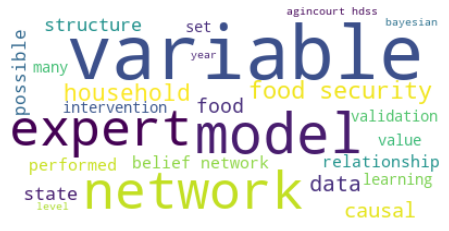

In [ ]:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud2, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
word_freq2={k: v for k, v in sorted(wordcloud2.process_text(long_string2).items(),reverse=True, key=lambda item: item[1])}

rel_freq2=wordcloud2.words_

In [ ]:
word_freq_Eyre = pd.Series(word_freq2)
print(word_freq_Eyre) 

variable         94
model            46
network          41
expert           40
food security    37
                 ..
willingness       1
farm              1
forage            1
claim             1
welfare           1
Length: 1071, dtype: int64


In [ ]:
rel_freq_Eyre = pd.Series(rel_freq2)
print(rel_freq_Eyre)

variable          1.000000
model             0.489362
network           0.436170
expert            0.425532
food security     0.393617
household         0.372340
data              0.340426
causal            0.319149
food              0.287234
state             0.244681
structure         0.234043
possible          0.202128
performed         0.170213
relationship      0.159574
belief network    0.159574
learning          0.148936
intervention      0.148936
value             0.148936
set               0.138298
validation        0.138298
many              0.138298
agincourt hdss    0.138298
bayesian          0.127660
level             0.127660
year              0.127660
dtype: float64


In [ ]:
word_freq_rel2 = pd.concat([word_freq_Eyre, rel_freq_Eyre], axis=1)
word_freq_rel2.head()

,0,1
variable,94,1.000000
model,46,0.489362
network,41,0.436170
expert,40,0.425532
food security,37,0.393617


In [ ]:
word_freq_rel2.to_csv('Eyre_word frequency.csv')

In [ ]:
#filter the df to one author, and create a list of responses from them
text = data[data.author =='Gadzalo'].paper_text_processed.tolist() 

# Join the different processed titles together.
long_string3 = ','.join(list(text))

#create the wordcloud object
wordcloud3 = WordCloud(stopwords = STOPWORDS, background_color="white", max_words=25, contour_width=3, contour_color='steelblue', collocations=True)

# Generate a word cloud
wordcloud3.generate(long_string3)

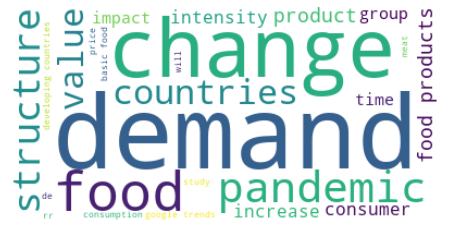

In [ ]:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud3, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
word_freq3={k: v for k, v in sorted(wordcloud3.process_text(long_string3).items(),reverse=True, key=lambda item: item[1])}

rel_freq3 = wordcloud3.words_

In [ ]:
rel_freq_Gadzalo = pd.Series(rel_freq3)
print(rel_freq_Gadzalo)

demand                  1.000000
change                  0.684211
food                    0.500000
pandemic                0.486842
structure               0.368421
countries               0.315789
value                   0.302632
product                 0.289474
food products           0.289474
consumer                0.223684
intensity               0.223684
increase                0.223684
impact                  0.197368
time                    0.197368
group                   0.197368
consumption             0.184211
google trends           0.184211
meat                    0.171053
will                    0.171053
price                   0.171053
rr                      0.171053
developing countries    0.171053
basic food              0.171053
de                      0.157895
study                   0.157895
dtype: float64


In [ ]:
word_freq_Gadzalo = pd.Series(word_freq3)
print(word_freq_Gadzalo) 

demand       76
change       52
food         38
pandemic     37
structure    28
             ..
geneity       1
fallen        1
oping         1
hardly        1
grown         1
Length: 959, dtype: int64


In [ ]:
word_freq_rel3 = pd.concat([word_freq_Gadzalo, rel_freq_Gadzalo], axis=1)
word_freq_rel3.head()

,0,1
demand,76,1.000000
change,52,0.684211
food,38,0.500000
pandemic,37,0.486842
structure,28,0.368421


In [ ]:
word_freq_rel3.to_csv('Gadzalo_word frequency.csv')